In [ ]:
pip install networkx matplotlib

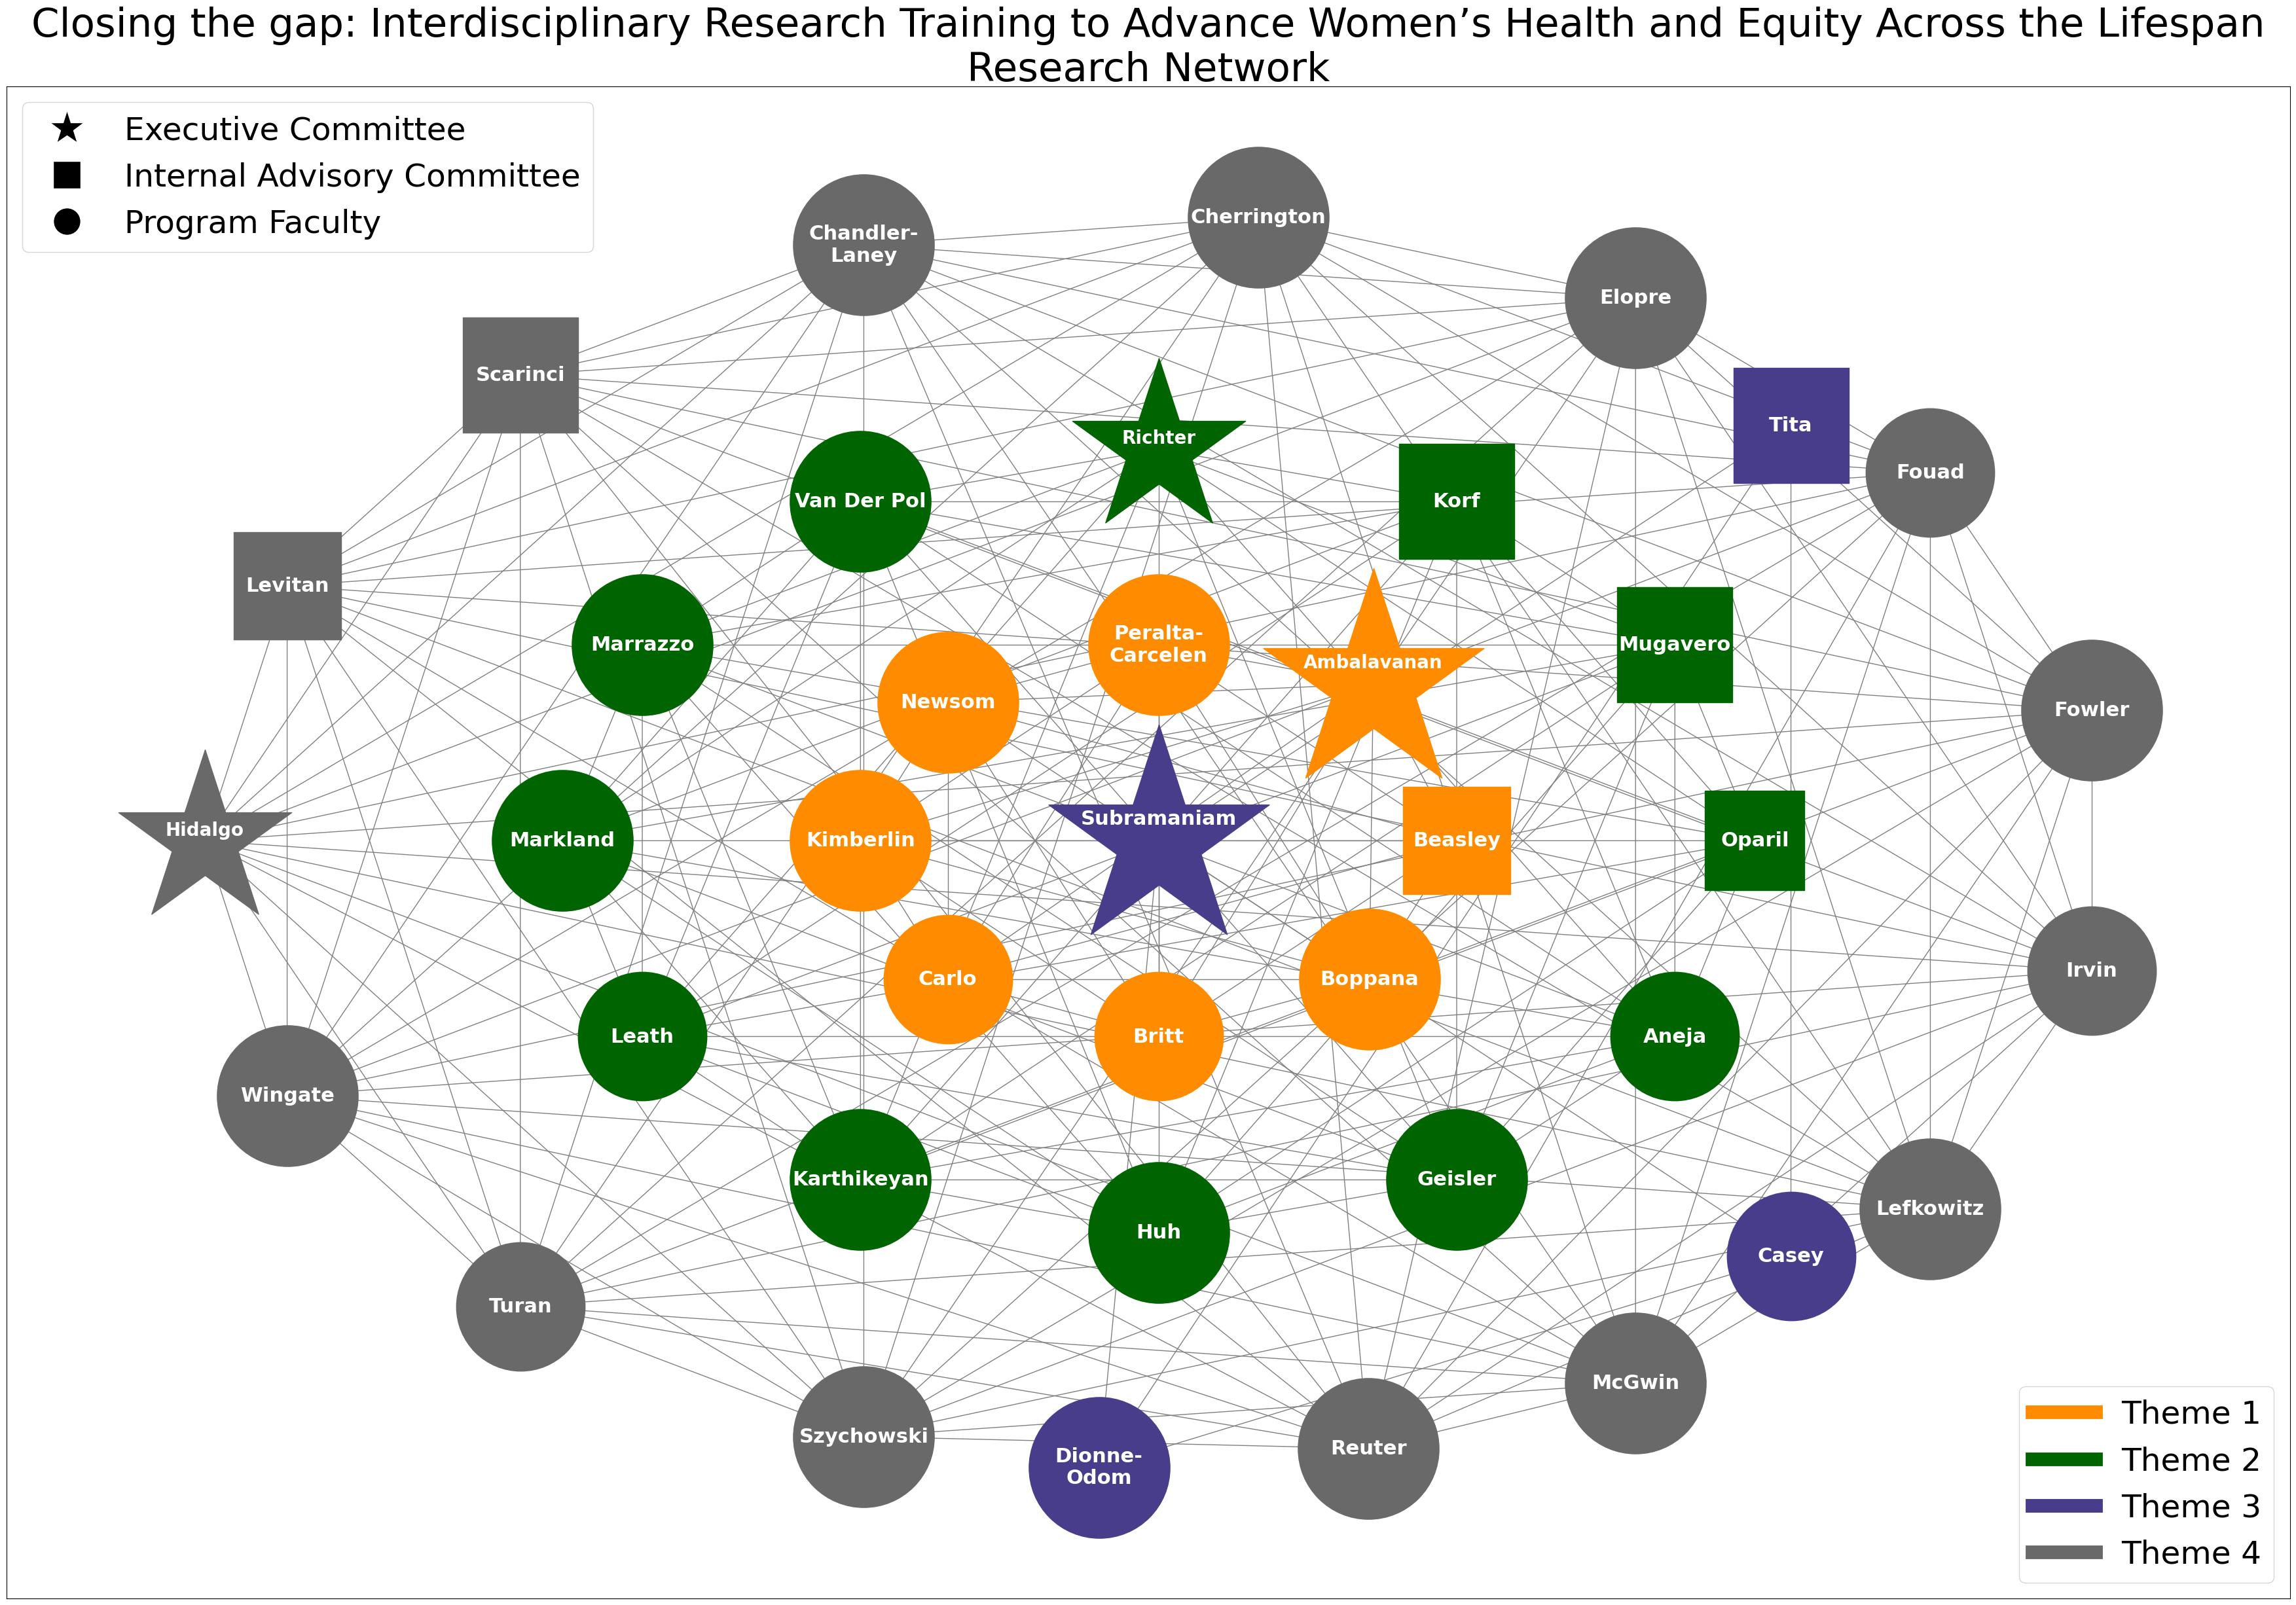

In [13]:
import networkx as nx
import matplotlib.pyplot as plt
from itertools import cycle
import numpy as np

# Create an empty graph
G = nx.Graph()

# Add nodes
G.add_node("Ambalavanan\n\n", role="Executive Committee", theme="Theme 1")
G.add_node("Peralta-\nCarcelen", role="Faculty", theme="Theme 1")
G.add_node("Newsom", role="Faculty", theme="Theme 1")
G.add_node("Kimberlin", role="Faculty", theme="Theme 1")
G.add_node("Carlo", role="Faculty", theme="Theme 1")
G.add_node("Britt", role="Faculty", theme="Theme 1")
G.add_node("Boppana", role="Faculty", theme="Theme 1")
G.add_node("Beasley", role="Internal Advisory Committee", theme="Theme 1")
G.add_node("Richter\n", role="Executive Committee", theme="Theme 2")
G.add_node("Van Der Pol", role="Faculty", theme="Theme 2")
G.add_node("Marrazzo", role="Faculty", theme="Theme 2")
G.add_node("Markland", role="Faculty", theme="Theme 2")
G.add_node("Leath", role="Faculty", theme="Theme 2")
G.add_node("Karthikeyan", role="Faculty", theme="Theme 2")
G.add_node("Huh", role="Faculty", theme="Theme 2")
G.add_node("Geisler", role="Faculty", theme="Theme 2")
G.add_node("Aneja", role="Faculty", theme="Theme 2")
G.add_node("Oparil", role="Internal Advisory Committee", theme="Theme 2")
G.add_node("Mugavero", role="Internal Advisory Committee", theme="Theme 2")
G.add_node("Korf", role="Internal Advisory Committee", theme="Theme 2")
G.add_node("Subramaniam\n\n", role="central", theme="Theme 3")
G.add_node("Dionne-\nOdom", role="Faculty", theme="Theme 3")
G.add_node("Casey", role="Faculty", theme="Theme 3")
G.add_node("Tita", role="Internal Advisory Committee", theme="Theme 3")
G.add_node("Hidalgo\n", role="Executive Committee", theme="Theme 4")
G.add_node("Wingate", role="Faculty", theme="Theme 4")
G.add_node("Turan", role="Faculty", theme="Theme 4")
G.add_node("Szychowski", role="Faculty", theme="Theme 4")
G.add_node("Reuter", role="Faculty", theme="Theme 4")
G.add_node("McGwin", role="Faculty", theme="Theme 4")
G.add_node("Lefkowitz", role="Faculty", theme="Theme 4")
G.add_node("Irvin", role="Faculty", theme="Theme 4")
G.add_node("Fowler", role="Faculty", theme="Theme 4")
G.add_node("Fouad", role="Faculty", theme="Theme 4")
G.add_node("Elopre", role="Faculty", theme="Theme 4")
G.add_node("Cherrington", role="Faculty", theme="Theme 4")
G.add_node("Chandler-\nLaney", role="Faculty", theme="Theme 4")
G.add_node("Scarinci", role="Internal Advisory Committee", theme="Theme 4")
G.add_node("Levitan", role="Internal Advisory Committee", theme="Theme 4")

themes = [
    "Theme 1", 
    "Theme 2", 
    "Theme 3", 
    "Theme 4"]
theme_cycle = cycle(themes)
theme_colors = {
    "Theme 1": "darkorange", 
    "Theme 2": "darkgreen", 
    "Theme 3": "darkslateblue", 
    "Theme 4": "dimgray"}

# Example connections based on theme
for theme in themes:
    members = [n for n in G.nodes if G.nodes[n]["theme"] == theme]
    for i, member1 in enumerate(members[:-1]):
        for member2 in members[i + 1:]:
            G.add_edge(member1, member2, color=theme_colors[theme])

# Define the shells
theme_1 = [node for node, data in G.nodes(data=True) if data['theme'] == "Theme 1"]
theme_2 = [node for node, data in G.nodes(data=True) if data['theme'] == "Theme 2"]
theme_3 = [node for node, data in G.nodes(data=True) if data['theme'] == "Theme 3"]
theme_4 = [node for node, data in G.nodes(data=True) if data['theme'] == "Theme 4"]

# Create shell layout
shells = [theme_1, theme_2, theme_3, theme_4]

# Create shell layout
pos = nx.shell_layout(G, shells, scale=1)

# Move 'Akila Subramaniam' to the center of the plot
pos["Subramaniam\n\n"] = np.array([0, 0])

# Move 'Dionne-\nOdom'
pos["Dionne-\nOdom"] = np.array([-.05, -.8])

# Move 'Reuter'
pos["Reuter"] = np.array([.22, -.97])

# Move 'Ambalavanan\n\n'
pos["Ambalavanan\n\n"] = np.array([.18, .2])

# Move Theme 4 nodes closer to the center
scaling_factor = .8  # Adjust this value to control the distance from the center
for node in theme_4:
    pos[node] = pos[node] * scaling_factor

# Set the figure size
plt.figure(figsize=(45, 30))

# Draw nodes with different shapes based on roles and colors based on theme
for node in G:
    node_color = theme_colors[G.nodes[node]["theme"]]
    if len(node) <= 5:  
        # adjust font size for this nodes with short labels only i.e. "Tita"
        # Calculate node size based on label length
        label_len = len(node)
        node_size = label_len * 4000
        font_size = 22
        
        # Check for role
        if G.nodes[node]["role"] == "Executive Committee":
            node_shape="*"
        elif G.nodes[node]["role"] == "Internal Advisory Committee":
            node_shape="s"
        else:
            node_shape="o"
         
        # Check if Dr.Huh
        if node[0] == "H":
            node_size = label_len * 8000
            
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_shape=node_shape, node_size=node_size)
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=font_size, font_color="white", font_weight="bold", verticalalignment="center", horizontalalignment="center")  
    elif G.nodes[node]["role"] == "central":
        # Calculate node size based on label length
        label_len = len(node)
        node_size = label_len * 5000
        font_size = max(min(22, int(node_size / 500)), 8)
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_shape="*", node_size=node_size)
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=font_size, font_color="white", font_weight="bold", verticalalignment="center", horizontalalignment="center")
    elif G.nodes[node]["role"] == "Executive Committee":
        # Calculate node size based on label length
        label_len = len(node)
        node_size = label_len * 5000
        font_size = max(min(20, int(node_size / 500)), 8)
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_shape="*", node_size=node_size)
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=font_size, font_color="white", font_weight="bold", verticalalignment="center", horizontalalignment="center")
    elif G.nodes[node]["role"] == "Internal Advisory Committee":
        # Calculate node size based on label length
        label_len = len(node)
        node_size = label_len * 2000
        font_size = max(min(22, int(node_size / 500)), 8)
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_shape="s", node_size=node_size)
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=font_size, font_color="white", font_weight="bold", verticalalignment="center", horizontalalignment="center")
    else:
        # Calculate node size based on label length
        label_len = len(node)
        node_size = 24000
        font_size = max(min(22, int(node_size / 500)), 8)
        nx.draw_networkx_nodes(G, pos, nodelist=[node], node_color=node_color, node_shape="o", node_size=node_size)
        nx.draw_networkx_labels(G, pos, labels={node: node}, font_size=font_size, font_color="white", font_weight="bold", verticalalignment="center", horizontalalignment="center")

# Draw edges with one color
nx.draw_networkx_edges(G, pos, edge_color="gray")

# Add legend for nodes
legend_elements_nodes = [
plt.Line2D([0], [0], marker="*", color="w", 
           label="Executive Committee", 
           markerfacecolor="black", 
           markersize=40),
plt.Line2D([0], [0], marker="s", color="w", 
           label="Internal Advisory Committee", 
           markerfacecolor="black", 
           markersize=30),
plt.Line2D([0], [0], marker="o", color="w", 
           label="Program Faculty", 
           markerfacecolor="black", 
           markersize=30),
]

# Add legend for themes
legend_elements_themes = [
plt.Line2D([0], [0], color="darkorange", lw=15, label="Theme 1"),
plt.Line2D([0], [0], color="darkgreen", lw=15, label="Theme 2"),
plt.Line2D([0], [0], color="darkslateblue", lw=15, label="Theme 3"),
plt.Line2D([0], [0], color="dimgray", lw=15, label="Theme 4")
]

# Create legends
legend1 = plt.legend(handles=legend_elements_nodes, loc="upper left", prop={"size": 35})
legend2 = plt.legend(handles=legend_elements_themes, loc="lower right", prop={"size": 35})

# Set the legend box size
legend1.get_frame().set_linewidth(1)
legend1.get_frame().set_facecolor('none')
legend2.get_frame().set_linewidth(1)
legend2.get_frame().set_facecolor('none')

# Add both legends to the plot
plt.gca().add_artist(legend1)

# Add title
plt.title("Closing the gap: Interdisciplinary Research Training to Advance Women’s Health and Equity Across the Lifespan\nResearch Network", fontsize=44)

# Save Figure
plt.savefig("ASubramaniam_Project_Border.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()